# Visualizacion de datos

In [92]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

ruta="/content/drive/MyDrive/Colab Notebooks/Projects/SECOP/Data/structured data/secop_consolidated.csv"

df = pd.read_csv(ruta, sep=';')

df.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,No,Entidad Estatal,Fecha de publicación,Cuantía,Descripción
0,1,SECRETARIA DISTRITAL DEL HABITAT,4/12/2020 5:02 PM (UTC -5 horas),40.000.000 COP,PRESTAR SERVICIOS PROFESIONALES PARA APOYAR EL...
1,2,INSTITUTO COLOMBIANO AGROPECUARIO - ICA,30/09/2020 8:14 PM (UTC -5 horas),300.000.000 COP,"DISEÑAR, DESARROLLAR E IMPLEMENTAR UN MODELO D..."
2,3,SENA REGIONAL ATLANTICO Intercentros,27/08/2020 5:14 PM (UTC -5 horas),11.775.000 COP,INVESTIGADOR EXPERTO EN BIG DATA Y BASES DE DA...
3,4,SANTIAGO DE CALI DISTRITO ESPECIAL - DEPARTAME...,25/08/2020 4:18 PM (UTC -5 horas),6.357.742.000 COP,Aunar esfuerzos para realizar todas las accion...
4,5,SANTIAGO DE CALI DISTRITO ESPECIAL - DEPARTAME...,25/08/2020 12:10 PM (UTC -5 horas),6.357.742.000 COP,Aunar esfuerzos para realizar todas las accion...
5,6,"INSTITUTO DE HIDROLOGIA, METEOROLOGÍA Y ESTUDI...",23/01/2020 6:43 PM (UTC -5 horas),81.719.000 COP,PRESTAR LOS SERVICIOS PROFESIONALES DE DESARRO...
6,7,DEPARTAMENTO ADMINISTRATIVO NACIONAL DE ESTADI...,15/01/2020 3:35 PM (UTC -5 horas),80.764.500 COP,42932_CENSO ECONOMICO_2020_DIG_BDDE_TH_Prestac...
7,8,DEPARTAMENTO ADMINISTRATIVO NACIONAL DE ESTADI...,14/01/2020 6:50 PM (UTC -5 horas),80.764.500 COP,42932_CENSO ECONOMICO_2020_DIG_BDDE_TH_Prestac...
8,9,Secretaria Distrital de Integración Social - O...,18/06/2019 7:25 PM (UTC -5 horas),482.000.000 COP,"SOLUCIÓN DATA LAKE DE BIG DATA Y ANALÍTICA, IN..."
9,10,"INSTITUTO DE HIDROLOGIA, METEOROLOGÍA Y ESTUDI...",7/02/2019 5:22 PM (UTC -5 horas),75.030.000 COP,PRESTAR LOS SERVICIOS DE DESARROLLO TEMPORAL D...


## Limpieza de fechas y separacion de dias, meses y años

In [93]:
# Function to clean date 
def clean_date(date):
  day, month, year = date.split('/')
  year = year[:4]
  return '/'.join([day, month, year])

# Clean date
df['Fecha de publicación'] = df.apply(lambda row: clean_date(row['Fecha de publicación']), axis=1)

# Separate year months and days
df['dia'] = df.apply(lambda row: row['Fecha de publicación'].split('/')[0], axis=1)
df['mes'] = df.apply(lambda row: row['Fecha de publicación'].split('/')[1], axis=1)
df['año'] = df.apply(lambda row: row['Fecha de publicación'].split('/')[2], axis=1)

df.head()

,No,Entidad Estatal,Fecha de publicación,Cuantía,Descripción,dia,mes,año
0,1,SECRETARIA DISTRITAL DEL HABITAT,4/12/2020,40.000.000 COP,PRESTAR SERVICIOS PROFESIONALES PARA APOYAR EL...,4,12,2020
1,2,INSTITUTO COLOMBIANO AGROPECUARIO - ICA,30/09/2020,300.000.000 COP,"DISEÑAR, DESARROLLAR E IMPLEMENTAR UN MODELO D...",30,09,2020
2,3,SENA REGIONAL ATLANTICO Intercentros,27/08/2020,11.775.000 COP,INVESTIGADOR EXPERTO EN BIG DATA Y BASES DE DA...,27,08,2020
3,4,SANTIAGO DE CALI DISTRITO ESPECIAL - DEPARTAME...,25/08/2020,6.357.742.000 COP,Aunar esfuerzos para realizar todas las accion...,25,08,2020
4,5,SANTIAGO DE CALI DISTRITO ESPECIAL - DEPARTAME...,25/08/2020,6.357.742.000 COP,Aunar esfuerzos para realizar todas las accion...,25,08,2020


## Limpieza y conversion de presupuesto



In [94]:
# Function to clean ammount
def clean_ammount(ammount):
    ammount = ammount.replace(' ', '')
    ammount = ammount.replace('.', '')
    ammount = ammount.replace('COP', '')
    ammount = ammount.replace(',', '.')
    ammount = ammount.replace('Sindocumento', '0')
    ammount = float(ammount)
    return ammount

df['Cuantía'] = df.apply(lambda row: clean_ammount(row['Cuantía']), axis=1)

df.head()

,No,Entidad Estatal,Fecha de publicación,Cuantía,Descripción,dia,mes,año
0,1,SECRETARIA DISTRITAL DEL HABITAT,4/12/2020,4.000000e+07,PRESTAR SERVICIOS PROFESIONALES PARA APOYAR EL...,4,12,2020
1,2,INSTITUTO COLOMBIANO AGROPECUARIO - ICA,30/09/2020,3.000000e+08,"DISEÑAR, DESARROLLAR E IMPLEMENTAR UN MODELO D...",30,09,2020
2,3,SENA REGIONAL ATLANTICO Intercentros,27/08/2020,1.177500e+07,INVESTIGADOR EXPERTO EN BIG DATA Y BASES DE DA...,27,08,2020
3,4,SANTIAGO DE CALI DISTRITO ESPECIAL - DEPARTAME...,25/08/2020,6.357742e+09,Aunar esfuerzos para realizar todas las accion...,25,08,2020
4,5,SANTIAGO DE CALI DISTRITO ESPECIAL - DEPARTAME...,25/08/2020,6.357742e+09,Aunar esfuerzos para realizar todas las accion...,25,08,2020


## Analisis descriptivo del presupuesto de los procesos publicados

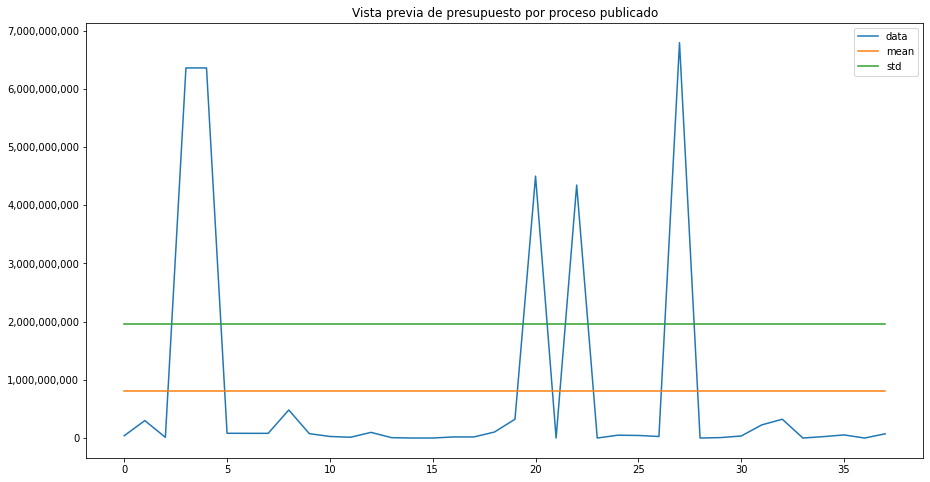

count    3.800000e+01
mean     8.150200e+08
std      1.955539e+09
min      0.000000e+00
25%      1.218825e+07
Name: Cuantía, dtype: float64

In [112]:
from pandas.core.tools.numeric import maybe_downcast_numeric
from matplotlib import pyplot as plt

describe = df['Cuantía'].describe()
mean = describe['mean']
std = describe['std']

ammount_data = list(df['Cuantía'])

ammount_df = pd.DataFrame({
      'data': ammount_data,
      'mean': [mean for i in range(len(ammount_data))],
      'std': [std for i in range(len(ammount_data))]})

ammount_df.plot(figsize=(15, 8), title='Vista previa de presupuesto por proceso publicado')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()
describe.head()

## Se clasifica por entidad y se cuentan la cantidad de procesos publicados

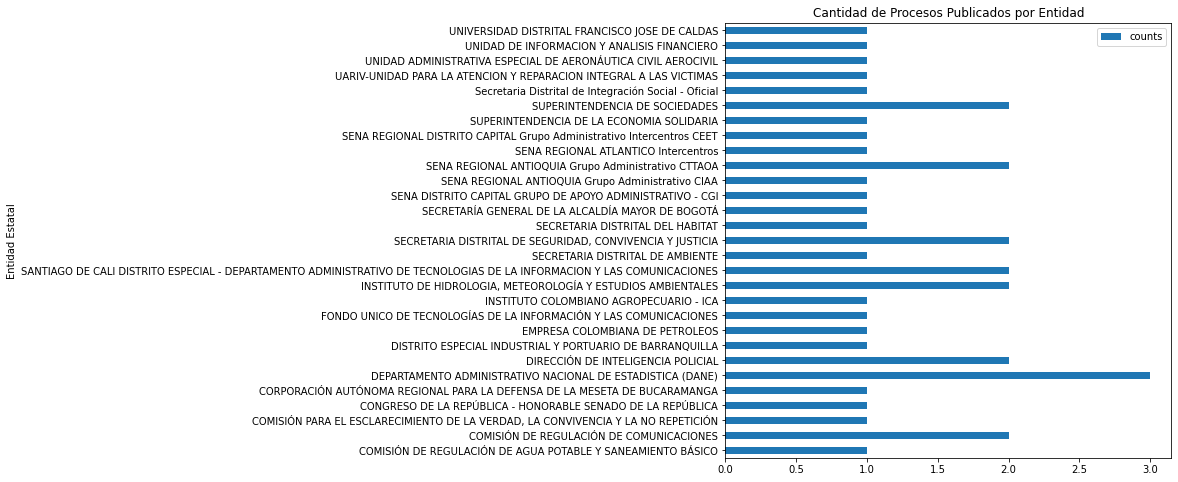

In [78]:
from numpy import size
entity_count = df.groupby(['Entidad Estatal'])['Entidad Estatal'].size().reset_index(name='counts')
# entity_count.head()
barh = entity_count.plot.barh(x='Entidad Estatal', y='counts', figsize=(8, 8), title='Cantidad de Procesos Publicados por Entidad')

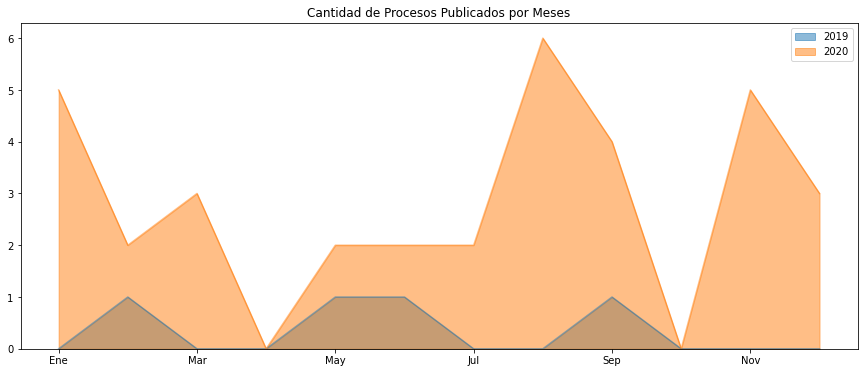

In [77]:
df2019 = df.loc[df['año'] == '2019']
df2020 = df.loc[df['año'] == '2020']


def count_by_month(year_df):
  months = [
      '01',
      '02',
      '03',
      '04',
      '05',
      '06',
      '07',
      '08',
      '09',
      '10',
      '11',
      '12',
  ]

  month_count = []
  for month in months:
    month_count.append(year_df.loc[df['mes'] == month]['mes'].count())
  return month_count
    
count_by_months_2019 = count_by_month(df2019)
count_by_months_2020 = count_by_month(df2020)

index = [
    'Ene',
    'Feb',
    'Mar',
    'Abr',
    'May',
    'Jun',
    'Jul',
    'Ago',
    'Sep',
    'Oct',
    'Nov',
    'Dic',
]
area_df = pd.DataFrame({
    '2019': count_by_months_2019,
    '2020': count_by_months_2020,
}, index=index)
ax = area_df.plot.area(stacked=False, figsize=(15, 6), title='Cantidad de Procesos Publicados por Meses')